# Exercise (Day 1): Making your own Population Pyramid Diagram

## What is a Population Pyramid

As our first Python program we will set out to make our own population pyramid to understand the distribution of age in a given country.

```{note}
A population pyramid (age structure diagram) or "age-sex pyramid" is a graphical illustration of the distribution of a population (typically that of a country or region of the world) by age groups and sex; it typically takes the shape of a pyramid when the population is growing.
```

Source: [Wikipedia](https://en.wikipedia.org/wiki/Population_pyramid)

A population pyramid is used to visually explain changes in demography over time.

A diagram with a wide base (i.e. high percentage of children) tends to have strong population growth in the future. 

The shape of the distribution has many economic implications such as:

1. tax policy
2. impacts of age depenency on government spending
3. understand population growth dynamics


This [Our World in Data Project article](https://ourworldindata.org/global-population-pyramid) uses one of these diagrams to look at the Demography of world population over time 

<center>
<img src="https://ourworldindata.org/images/published/Population-Pyramid-1950-to-2100_3000.png" alt="drawing" width="600"/>
</center>

## Exercise #1: Run the following python code to build a population pyramid for Australia

This exercise will first show you how to construct a population pyramid for Australia in 1960 and 2023. 

You will then be asked to make a population pyramid for either `Benin`, `Côte d'Ivoire`, or `Uganda`. 

All data sourced for this exercise is from the [World Development Indicators](https://datatopics.worldbank.org/world-development-indicators/) database.

---

First we will need to import some useful packages

```{hint}
To execute the code select the cell below and push <shift>+<enter>
```

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# import pyodide_http
# pyodide_http.patch_all()

We will need to fetch the data needed to build a plot

There is a saved dataset Australia that contains the share of population within certain age groups (i.e. 0-4, 5-9) for Australia in 1960 and 2023.

You can retrieve this data by executing the following cell

```{hint}
To execute the code select the cell below and push <shift>+<enter>
```

In [57]:
URL = "https://raw.githubusercontent.com/QuantEcon/africa-summer-course-2024/main/exercises/day-01/datapop_shares_aus.csv"
# Use the pandas package to read the csv from out github repository
plot_data = pd.read_csv(URL)

Let us first take a look at the data that has been imported

In [55]:
plot_data.head()  # the .head() method returns the first 5 lines of the DataFrame

,age,year,female,male
0,80+,2023,-4.981383,3.838151
1,80+,1960,-1.619326,0.948079
2,75-79,2023,-3.598009,3.384923
3,75-79,1960,-1.809344,1.280289
4,70-74,2023,-4.455070,4.215617


You can see that this dataset contains four columns named `age`, `year`, `female`, and `male`.

Let's take a closer look at the `age` column to understand what that column represents

In [58]:
plot_data['age'].unique()

array(['80+', '75-79', '70-74', '65-69', '60-64', '55-59', '50-54',
       '45-49', '40-44', '35-39', '30-34', '25-29', '20-24', '15-19',
       '10-14', '05-09', '00-04'], dtype=object)

As you can see it consists of various age groups. 

This is the format we need for building a population pyramid. 

Now let's look at the year column

In [59]:
plot_data.year.unique()

array([2023, 1960])

This dataset contains data for `two` different years so we will need to filter for either 1960 or 2023 when building our figures.

Let's first collect the data for 1960 into a separate dataframe

In [61]:
plot_1960 = plot_data[plot_data.year == 1960]
plot_1960.head()

,age,year,female,male
1,80+,1960,-1.619326,0.948079
3,75-79,1960,-1.809344,1.280289
5,70-74,1960,-2.818732,2.211589
7,65-69,1960,-3.606390,2.885782
9,60-64,1960,-4.049524,3.566932


This data is now in the format we need to build a figure.

We will use a python package called [seaborn]() to build the visualisation as horizontal bar charts. 

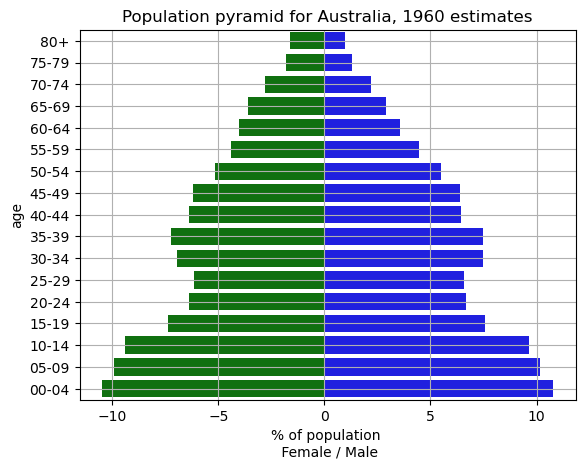

In [67]:
# - Make Plot for 1960
ax1 = sns.barplot(x='male', y='age', data=plot_1960, color="blue")
ax2 = sns.barplot(x='female', y='age', data=plot_1960, color="green")
plt.title("Population pyramid for Australia, 1960 estimates")
plt.xlabel("% of population \n Female / Male")
plt.grid()

In the 1960's Australia had a typical wide based population pyramid, with a higher percentage of children when compared to the rest of the population. 

We have data from 2023 in our dataset so let us compare the two

In [68]:
plot_2023 = plot_data[plot_data.year == 2023]

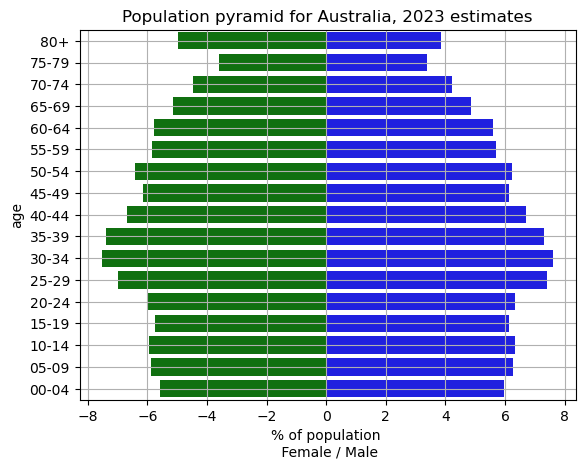

In [69]:
# - Overlay of both Years
ax3 = sns.barplot(x='male', y='age', data=plot_2023, color="blue")
ax4 = sns.barplot(x='female', y='age', data=plot_2023, color="green")
plt.title("Population pyramid for Australia, 2023 estimates")
plt.xlabel("% of population \n Female / Male")
plt.grid()

The shape of this pyramid has changed significantly, with the highest cohort (by percentage) between the age of 30 and 40. 

It may be more convenient to see these plots side by side

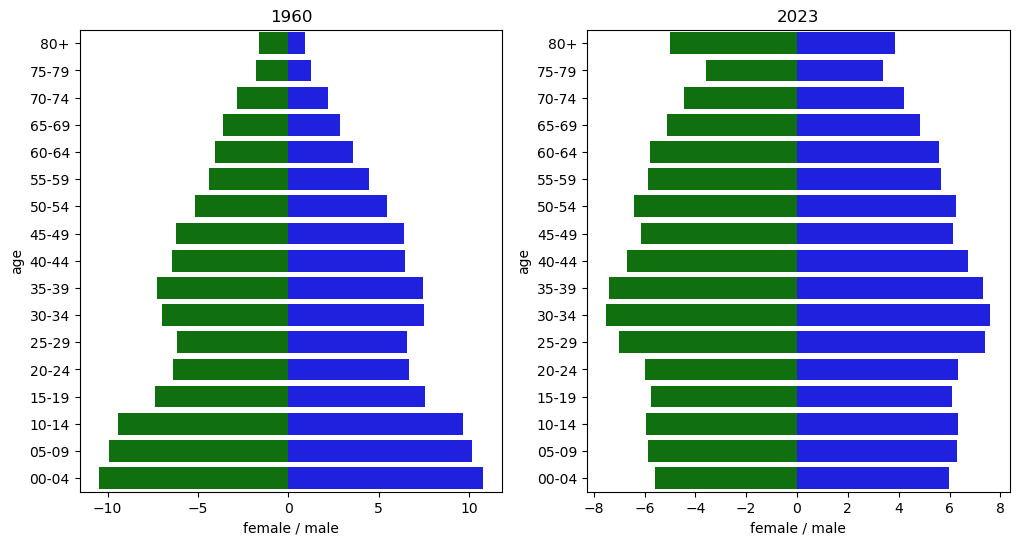

In [70]:
import matplotlib.pyplot as plt
figure, axes = plt.subplots(1, 2, figsize=(12,6))
year = [1960, 2023]
index = 0
for axis in axes:
    ax1 = sns.barplot(x='male', y='age', data=plot_data[plot_data['year'] == year[index]], color="blue", ax=axis)
    ax2 = sns.barplot(x='female', y='age', data=plot_data[plot_data['year'] == year[index]], color="green", ax=axis)
    axis.set_xlabel("female / male")
    axis.set_title(year[index])
    index = index+1
plt.show()

### Question: What else do you observe by comparing these two plots?

---

## Exercise #2: Making your own population pyramid

Above you have been shown how to make a population pyramid for Australia using prepared data. 

In this section we will:

1. Show how this data was retrieved from the world development indicators database
2. See how to prepare the data, extracting the information you need
3. Save the data of interest to build a plot for `Benin`, `Côte d'Ivoire`, or `Uganda`.
4. Make your own plot (using the code above)

---

**Step #1:** Getting Data from the World Bank World Development Indicators

One way to get data from the [WDI](http://wdi.worldbank.org) database is to use the [World Bank Databank](https://databank.worldbank.org) website.

We have fetched some data for the countries `Australia`, `Benin`, `Côte d'Ivoire`, or `Uganda` and saved the output as a csv file that we will use in this exercise.

The RAW world bank data looks like this once downloaded.

In [71]:
URL = "https://raw.githubusercontent.com/QuantEcon/africa-summer-course-2024/main/exercises/day-01/wdi-data-exercise-day01-all.csv"
data = pd.read_csv(URL)

In [72]:
data.head()

,Country Name,Country Code,Series Name,Series Code,1960,1970,1980,1990,2000,2010,2020,2023
0,Australia,AUS,"Population ages 00-04, female (% of female pop...",SP.POP.0004.FE.5Y,10.480677,9.322055,7.530362,7.172339,6.481703,6.371332,5.848970,5.574327
1,Australia,AUS,"Population ages 00-04, male (% of male populat...",SP.POP.0004.MA.5Y,10.781845,9.658687,7.921738,7.585953,6.927366,6.779684,6.282570,5.966725
2,Australia,AUS,"Population ages 05-09, female (% of female pop...",SP.POP.0509.FE.5Y,9.911938,9.587401,8.637762,7.177850,6.810105,6.002763,6.096275,5.862372
3,Australia,AUS,"Population ages 05-09, male (% of male populat...",SP.POP.0509.MA.5Y,10.140228,9.979450,9.044278,7.599521,7.285220,6.379275,6.522612,6.276601
4,Australia,AUS,"Population ages 10-14, female (% of female pop...",SP.POP.1014.FE.5Y,9.396905,9.320753,8.477508,7.042719,6.770388,6.102217,5.962129,5.943782


The dataset is nicely organised, however it is not in the format we need to build a plot. 

For a country of interest we would want the dataset to be in the format we observed in Exercise #1 (above)

|age |	year |	female	| male |
|----|-------|----------|------|
| 80+	| 1960 |	-1.619326	| 0.948079|
| 75-79	| 1960 |	-1.809344	| 1.280289|
| 70-74	| 1960 |	-2.818732	| 2.211589|
| 65-69	| 1960 |	-3.606390	| 2.885782|
| 60-64	| 1960 |	-4.049524	| 3.566932|

What we can see from the raw data is the information is there (for example, the age brackets are embedded in the `Series Name`) but we will need to extract the data that we would like for our figure.

Python can help with this

---

**Step 2:** Understand the dataset and extract the information you need for the population pyramid

We can first take a look at what countries are in this dataset

In [73]:
data['Country Code'].unique()

array(['AUS', 'BEN', 'CIV', 'UGA'], dtype=object)

Then we can look at what `Series` are in this dataset

In [74]:
data['Series Name'].unique()

array(['Population ages 00-04, female (% of female population)',
       'Population ages 00-04, male (% of male population)',
       'Population ages 05-09, female (% of female population)',
       'Population ages 05-09, male (% of male population)',
       'Population ages 10-14, female (% of female population)',
       'Population ages 10-14, male (% of male population)',
       'Population ages 15-19, female (% of female population)',
       'Population ages 15-19, male (% of male population)',
       'Population ages 20-24, female (% of female population)',
       'Population ages 20-24, male (% of male population)',
       'Population ages 25-29, female (% of female population)',
       'Population ages 25-29, male (% of male population)',
       'Population ages 30-34, female (% of female population)',
       'Population ages 30-34, male (% of male population)',
       'Population ages 35-39, female (% of female population)',
       'Population ages 35-39, male (% of male popula

It is nice that we have data for all the age-brackets in the one DataFrame, however what we would like to do is extract the age brackets (such as "0-4" from this data). 

We can use `python string` manipulation to achieve this pretty simply by recognizing the common patterns in the string.

Let's look at one string more closely. 

In [77]:
data['Series Name'][0]

'Population ages 00-04, female (% of female population)'

We can split the string on the "," character and then replace "Population ages " with nothing to extract the `00-04` text. 

In [79]:
data['Series Name'][0].split(",")[0].replace("Population ages ", "")

'00-04'

We did it! 

Because this pattern is consistent we can use python to apply this to all `Series Name` rows.

We will collect the text in a Python List and then add it to our dataset as a new column

In [80]:
age_brackets = []
for sn in data['Series Name']:
    a,b = sn.split(",")
    a = a.replace("Population ages ", "")
    if a == '80 and above':
        a = '80+'
    age_brackets.append(a)

In [82]:
data['age'] = age_brackets

In [84]:
data.head()

,Country Name,Country Code,Series Name,Series Code,1960,1970,1980,1990,2000,2010,2020,2023,age
0,Australia,AUS,"Population ages 00-04, female (% of female pop...",SP.POP.0004.FE.5Y,10.480677,9.322055,7.530362,7.172339,6.481703,6.371332,5.848970,5.574327,00-04
1,Australia,AUS,"Population ages 00-04, male (% of male populat...",SP.POP.0004.MA.5Y,10.781845,9.658687,7.921738,7.585953,6.927366,6.779684,6.282570,5.966725,00-04
2,Australia,AUS,"Population ages 05-09, female (% of female pop...",SP.POP.0509.FE.5Y,9.911938,9.587401,8.637762,7.177850,6.810105,6.002763,6.096275,5.862372,05-09
3,Australia,AUS,"Population ages 05-09, male (% of male populat...",SP.POP.0509.MA.5Y,10.140228,9.979450,9.044278,7.599521,7.285220,6.379275,6.522612,6.276601,05-09
4,Australia,AUS,"Population ages 10-14, female (% of female pop...",SP.POP.1014.FE.5Y,9.396905,9.320753,8.477508,7.042719,6.770388,6.102217,5.962129,5.943782,10-14


Now we will need two columns that contain `male` or `female`

We can apply similar logic.

In [86]:
gender = []
for sn in data['Series Name']:
    if 'female' in sn:
        gender.append('female')
    elif 'male' in sn:
        gender.append('male')
    else:
        raise ValueError("ERROR: cannot determine gender -- check data source")

```{note}
Even though you may have never programmed in Python before you can probably read this code and understand what it is doing.
```

In [87]:
data['gender'] = gender

In [88]:
data.head()

,Country Name,Country Code,Series Name,Series Code,1960,1970,1980,1990,2000,2010,2020,2023,age,gender
0,Australia,AUS,"Population ages 00-04, female (% of female pop...",SP.POP.0004.FE.5Y,10.480677,9.322055,7.530362,7.172339,6.481703,6.371332,5.848970,5.574327,00-04,female
1,Australia,AUS,"Population ages 00-04, male (% of male populat...",SP.POP.0004.MA.5Y,10.781845,9.658687,7.921738,7.585953,6.927366,6.779684,6.282570,5.966725,00-04,male
2,Australia,AUS,"Population ages 05-09, female (% of female pop...",SP.POP.0509.FE.5Y,9.911938,9.587401,8.637762,7.177850,6.810105,6.002763,6.096275,5.862372,05-09,female
3,Australia,AUS,"Population ages 05-09, male (% of male populat...",SP.POP.0509.MA.5Y,10.140228,9.979450,9.044278,7.599521,7.285220,6.379275,6.522612,6.276601,05-09,male
4,Australia,AUS,"Population ages 10-14, female (% of female pop...",SP.POP.1014.FE.5Y,9.396905,9.320753,8.477508,7.042719,6.770388,6.102217,5.962129,5.943782,10-14,female


---

**Step #3:** Now we just need to build a small dataset with the data needed for our population pyramid

Let's filter the dataset for Australia using the following code

In [194]:
cntry_data = data[data['Country Code'] == "AUS"]                 # save data for 'AUS' in cntry_data 
plot_data = cntry_data[['1960', '2023', 'age', 'gender']]

In [195]:
plot_data.head()

,1960,2023,age,gender
0,10.480677,5.574327,00-04,female
1,10.781845,5.966725,00-04,male
2,9.911938,5.862372,05-09,female
3,10.140228,6.276601,05-09,male
4,9.396905,5.943782,10-14,female


This isn't quite in the shape we need for the graph.

Let's reshape this dataset so we have years in one column, and the data in their own `male` and `female` columns instead. 

In [196]:
plot_data = plot_data.pivot(index='age', columns='gender')
plot_data.columns.names = ['year', 'gender']

In [197]:
plot_data.head()

year         1960                 2023          
gender     female       male    female      male
age                                             
00-04   10.480677  10.781845  5.574327  5.966725
05-09    9.911938  10.140228  5.862372  6.276601
10-14    9.396905   9.665174  5.943782  6.343711
15-19    7.363435   7.571252  5.733758  6.114841
20-24    6.379235   6.652719  5.975467  6.332740

**Note:** The pandas package tracks all the relationships between data and their labels for you. 

In [198]:
plot_data = plot_data.stack(level=0).reset_index()
plot_data['year'] = plot_data['year'].astype(int)      # make sure years are numbers
plot_data['female'] = plot_data['female'] * -1         # put the bar chart on the LHS of axis
plot_data = plot_data.sort_values(by='age', ascending=False)

In [199]:
plot_data.head()

gender,age,year,female,male
33,80+,2023,-4.981383,3.838151
32,80+,1960,-1.619326,0.948079
31,75-79,2023,-3.598009,3.384923
30,75-79,1960,-1.809344,1.280289
29,70-74,2023,-4.455070,4.215617


**Step #4:** Build the Figure

The data is now in the format we need to build our charts from Exercise #1.

Let's copy the code below

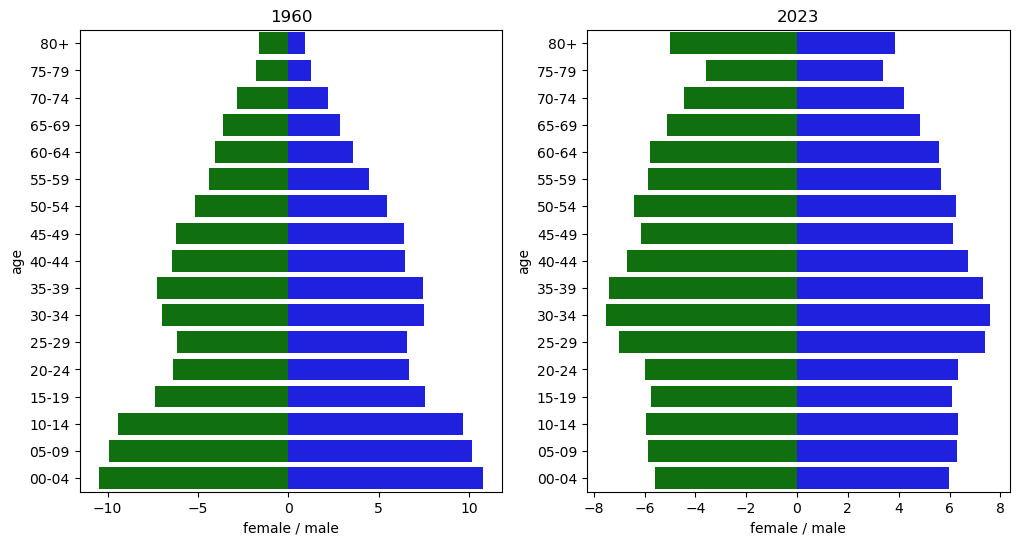

In [200]:
figure, axes = plt.subplots(1, 2, figsize=(12,6))
year = [1960, 2023]
index = 0
for axis in axes:
    ax1 = sns.barplot(x='male', y='age', data=plot_data[plot_data['year'] == year[index]], color="blue", ax=axis)
    ax2 = sns.barplot(x='female', y='age', data=plot_data[plot_data['year'] == year[index]], color="green", ax=axis)
    axis.set_xlabel("female / male")
    axis.set_title(year[index])
    index = index+1
plt.show()

## Exercise: Build your own population pyramid using the code above and modifying it

The country code data for each country is

| Country | Country Code |
|---------|--------------|
| Benin   | BEN |
| Côte d'Ivoire | CIV | 
| Uganda | UGA |

Start with the code from **Step 3** above and modify it to find the country you are interested in.

In [202]:
# You will need to change 'AUS' to another country code here
cntry_data = data[data['Country Code'] == ]                 
plot_data = cntry_data[['1960', '2023', 'age', 'gender']]

SyntaxError: invalid syntax (3053006593.py, line 2)

**Note:** You could also just change the country code in `Step #3` above and re-run the cells.

The great part of building programs is once you have done the work for one country, you have done the work for any country you are interested in building the plot for. 

### Exercise 3: See if you can change the plots (i.e. change the colour)